<a href="https://colab.research.google.com/github/transcend112/CAP_coursex/blob/master/nkumarachchi2019_CAP5768_Fall2020_Assignment2_STARTER_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CAP 5768 - Data Science - Dr. Marques - Fall 2020

# Assignment 2: Exploratory Data Analysis (EDA)
## STARTER 

### Goals 

- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured in two parts.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 

---------
### Imports + Google Drive

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-------------------
## Part 1: Salaries

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [ ]:
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv') 
#salaries = pd.read_csv('./data/salaries.csv') 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


### 1.1 Your turn! (2 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

Hint: Your solution should have a code cell (2-3 lines of Python) + a text cell (bullet list, explaining the meaning of each variable _to the best of your knowledge_)

In [ ]:
# Enter your code here
salaries.head()


,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


*   earn = salary/year in USD 
*   height = hieght in inches
* sex
* ed = years of education
* age = age of person in years
* race = white/ black/ hispanic/ asian


--------------------
### Summary statistics and correlations

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [ ]:
salary = np.array(salaries['earn'])

print("--- Salary statistics ---")


print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


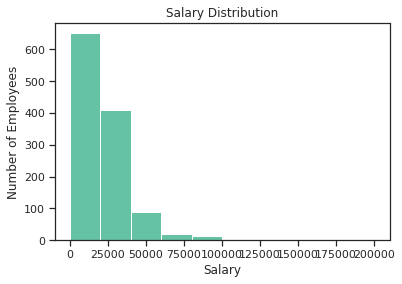

In [ ]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

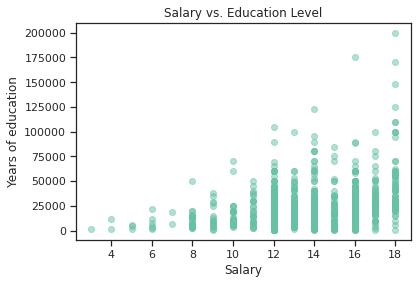

In [ ]:
years = np.array(salaries['ed'])

plt.title('Salary vs. Education Level')
plt.xlabel('Salary')
plt.ylabel('Years of education');

plt.scatter(years, salary, alpha=0.5)
plt.show()

In [ ]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

### 1.2 Your turn! (10-14 points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (2 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (8 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 4 bonus points)


In [ ]:
# 1. Display the total headcount and the number (and %) of male and female employees. (2 pts)

from collections import Counter

Arrsex = np.array(salaries['sex'])
sex_counts = Counter(Arrsex)  # count as a dictionary

print(sex_counts)
sex_counts["male"]

Arrsex = np.array(salaries['sex'])

print(len(Arrsex))
print("numer of males =", sex_counts["male"])
print("numer of females =", sex_counts["female"])

print("male % =", sex_counts["male"]/len(Arrsex) *100)
print("female % =", sex_counts["female"]/len(Arrsex) *100)

Counter({'female': 687, 'male': 505})
1192
numer of males = 505
numer of females = 687
male % = 42.36577181208054
female % = 57.63422818791947


In [ ]:
# 2. Compute and display the min, max, average, and median salary per gender. (8 pts)


print("male_mean =", np.mean(salary[Arrsex=='male']) )
print("male_max = ", np.max(salary[Arrsex=='male']) )
print("male_min =", np.min(salary[Arrsex=='male']) )
print("male_avg = ", np.average(salary[Arrsex=='male']) )
print("male_avg =", np.median(salary[Arrsex=='male']) )


print("female_mean =", np.mean(salary[Arrsex=='female']) )
print("female_max =", np.max(salary[Arrsex=='female']) ) 
print("female_min =", np.min(salary[Arrsex=='female']) )
print("female_avg =", np.average(salary[Arrsex=='female']) ) 
print("female_avg =", np.median(salary[Arrsex=='female']) )



male_mean = 29786.130693069306
male_max =  200000.0
male_min = 1000.0
male_avg =  29786.130693069306
male_avg = 25000.0
female_mean = 18280.195050946142
female_max = 123000.0
female_min = 200.0
female_avg = 18280.195050946142
female_avg = 15000.0


In [ ]:
# 3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (if any is present) associated with the salaries in the company. (<= 4 bonus points)

In [ ]:
import pandas as pd

ravel_in_race = salaries["race"].values.ravel() # reveal all column single colomn

pd.unique(ravel_in_race)  # reveal unique values

print(pd.unique(ravel_in_race))



['white' 'other' 'hispanic' 'black']


In [ ]:

ArrRace = np.array(salaries['race'])

count_in_race = Counter(ArrRace)
count_in_race

Counter({'black': 112, 'hispanic': 66, 'other': 25, 'white': 989})

In [ ]:
count_in_race["black"]

112

In [ ]:
male_race_count_dic = Counter(ArrRace[Arrsex=='male']) 

female_race_count_dic = Counter(ArrRace[Arrsex=='female']) 


In [ ]:
female_race_count_dic

Counter({'black': 68, 'hispanic': 36, 'other': 15, 'white': 568})

In [ ]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


In [ ]:
#(list1, 40, 100)

In [ ]:
def count_range_in_list(li, min, max):
	ctr = 0
	for x in li:
		if min <= x <= max:
			ctr += 1
	return ctr

#list1 = [10,20,30,40,40,40,70,80,99]
#print(count_range_in_list(list1, 40, 100))

male_1K_to_50K = count_range_in_list(salary, np.min(salary[Arrsex=='male']), (np.min(salary[Arrsex=='male']+50000) ))
male_50K_to_100K = count_range_in_list(salary, (np.min(salary[Arrsex=='male']+50001)), (np.min(salary[Arrsex=='male']+100000)) )
male_100K_to_150K = count_range_in_list(salary, (np.min(salary[Arrsex=='male']+100001)), (np.min(salary[Arrsex=='male']+150000)) )
male_150K_to_200K = count_range_in_list(salary, (np.min(salary[Arrsex=='male']+150001)), (np.min(salary[Arrsex=='male']+200001)) )

female_1K_to_50K = count_range_in_list(salary, np.min(salary[Arrsex=='female']), (np.min(salary[Arrsex=='female']+50000) ))
female_50K_to_100K = count_range_in_list(salary, (np.min(salary[Arrsex=='female']+50001)), (np.min(salary[Arrsex=='female']+100000)) )
female_100K_to_150K = count_range_in_list(salary, (np.min(salary[Arrsex=='female']+100001)), (np.min(salary[Arrsex=='female']+150000)) )
female_150K_to_200K = count_range_in_list(salary, (np.min(salary[Arrsex=='female']+150001)), (np.min(salary[Arrsex=='female']+200001)) )




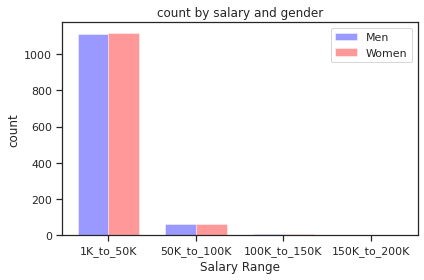

In [ ]:
# 3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (if any is present) associated with the salaries in the company. (<= 4 bonus points)

import matplotlib.pyplot as plt

n_groups = 4

for_men2 = (male_1K_to_50K, male_50K_to_100K, male_100K_to_150K, male_150K_to_200K)


for_women2 = (female_1K_to_50K, female_50K_to_100K, female_100K_to_150K, female_150K_to_200K)

index2 = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

rects1 = plt.bar(index2, for_men2, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Men')

rects2 = plt.bar(index2 + bar_width, for_women2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Women')

plt.xlabel('Salary Range')
plt.ylabel('count')
plt.title('count by salary and gender')
plt.xticks(index2 + bar_width / 2, ('1K_to_50K', '50K_to_100K', '100K_to_150K', '150K_to_200K') )
plt.legend()

plt.tight_layout()
plt.show()

*Enter your text here*

--------------------
### Signs of inequality

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc.. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------
### Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

- H1: Older employees are paid less (i.e., ageism)
- H2: Female employees are paid less (i.e., gender bias)
- H3: Non-whites are paid less (i.e, race bias).

### 1.3 Your turn! (18-26 points)

Write Python code to test hypotheses H1, H2, and H3 (and some text to explain whether they were confirmed or not). 

Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. 

**Weight**: 18 pts, i.e., 6 pts per hypothesis. 
Up to 8 bonus points for insightful additional hypotheses, code, and/or comments.  

####Testing H1:



*   H0 : There is no significant dfference in employees age and payments
*   H1: Older employees are paid less





In [ ]:
# Compute Pearson coefficient
ArrAge = np.array(salaries['age'])

corr, _ = pearsonr(salary, ArrAge)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.08100297364190615


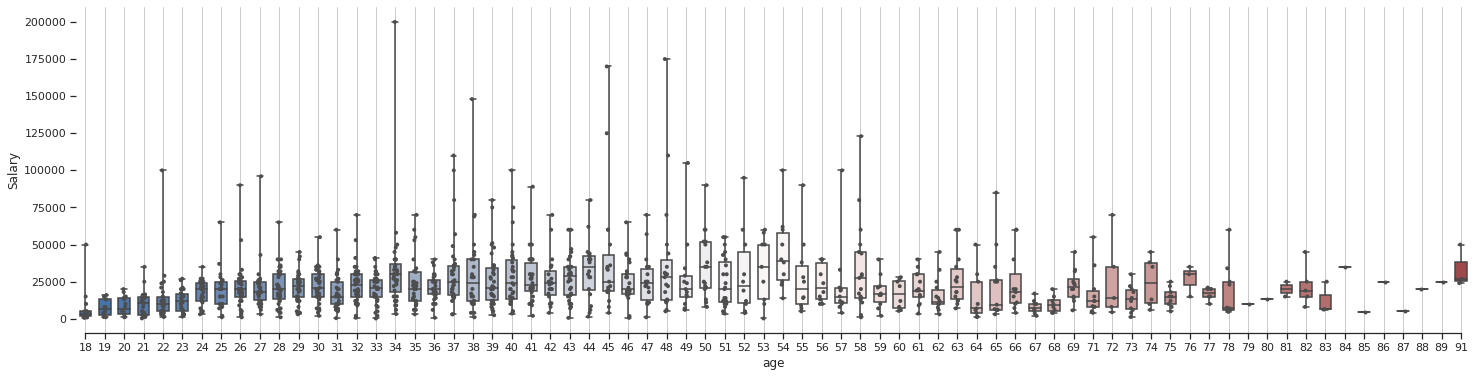

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(25, 6))
#ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x="age", y="earn", data=salaries,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="age", y="earn", data=salaries,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Salary")
sns.despine(trim=True, left=True)

#### conclusion
Pearson coefficient (CF) between Age and salary is -0.5 < CF < +0.5
Therefore, H0 is accepeted and H1 is rejected. Therefore, There is no significant dfference in employees age and payments

also meadian value is nearly constant over differenet ages, 



#### Testing H2:

*  H0 : There is no significant dfference between gender and payments
* H2: Female employees are paid less (gender bias)

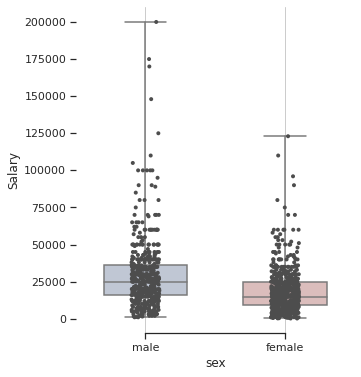

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 6))
#ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x="sex", y="earn", data=salaries,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="sex", y="earn", data=salaries,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Salary")
sns.despine(trim=True, left=True)

#### conclusion
there is a difference in meadian values over male and female, therfore H0 is rejected and H1 is accepeted. Therefore, There is a significant dfference in gender and payments.

#### Testing H3:

* H0 : There is no significant dfference in ethnicity and payments
* H3: non-whites are paid less (gender bias)

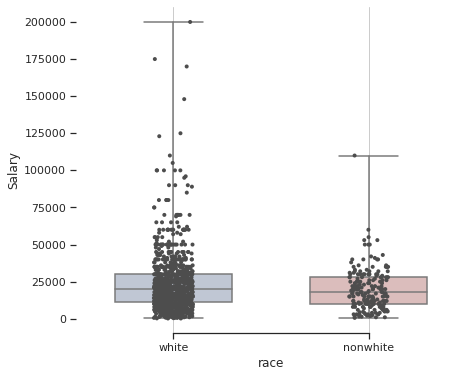

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="ticks")

# df['range'] = df['range'].str.replace(',','-')

#salaries["race"]= salaries["race"].replace("nonwhite", "other")
salaries['race'] = salaries['race'].replace( {"other" : "nonwhite" , "black" : "nonwhite" , "hispanic" : "nonwhite" } )

#nonwhite = np.array(salaries['race'] != 'white')

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(x="race", y="earn", data=salaries,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="race", y="earn", data=salaries,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Salary")
sns.despine(trim=True, left=True)

#### conclusion
meadian value is nearly same over ethinicity, therfore H0 is accepeted and H1 is rejected. Therefore, There is no significant dfference in ethnicity  and payments

-------------------
## Part 2: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [ ]:
CarData = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(CarData.shape)

(406, 9)


In [ ]:
CarData.dropna(inplace=True)
CarData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [ ]:
CarData.shape

(392, 9)

### 2.1 Your turn! (10-12 points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)


In [ ]:
# Enter your code here
#Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)

ArrCyl = np.array(CarData['cylinders'])

cly_count = Counter(ArrCyl) # cylinder column as a dictionary

print("numer of 3 clylinder cars =", cly_count[3])
print("numer of 5 clylinder cars=", cly_count[5])


CarData.shape

numer of 3 clylinder cars = 4
numer of 5 clylinder cars= 3


(392, 9)

In [ ]:
# discard 3- and 5-cylinder vehicles rows
CarData2 =   CarData[ (CarData.cylinders != 3) & (CarData.cylinders != 5) ]

  
CarData2.head()
CarData2.shape

(385, 9)

In [ ]:
# 2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)

Arrmpg = np.array(CarData['mpg'])


print("4 cyl min =", np.min(Arrmpg[ArrCyl==4]) )
print("4 cyl max =", np.max(Arrmpg[ArrCyl==4]) )
print("4 cyl avg =", np.average(Arrmpg[ArrCyl==4]) )


print("6 cyl min =", np.min(Arrmpg[ArrCyl==6]) )
print("6 cyl max =", np.max(Arrmpg[ArrCyl==6]) )
print("6 cyl avg =", np.average(Arrmpg[ArrCyl==6]) )

print("8 cyl min =", np.min(Arrmpg[ArrCyl==8]) )
print("8 cyl max =", np.max(Arrmpg[ArrCyl==8]) )
print("8 cyl avg =", np.average(Arrmpg[ArrCyl==8]) )


4 cyl min = 18.0
4 cyl max = 46.6
4 cyl avg = 29.28391959798995
6 cyl min = 15.0
6 cyl max = 38.0
6 cyl avg = 19.973493975903615
8 cyl min = 9.0
8 cyl max = 26.6
8 cyl avg = 14.963106796116506


In [ ]:
c = CarData2.groupby('cylinders')

c.agg([np.min, np.max, np.mean])['mpg']

,amin,amax,mean
cylinders,,,
4.0,18.0,46.6,29.283920
6.0,15.0,38.0,19.973494
8.0,9.0,26.6,14.963107


In [ ]:
# (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)
np.min(Arrmpg)

Arrmpg = np.array(CarData2['mpg'])

ArrCarName = np.array(CarData2['car_name'])

ArrCarName.shape

print("most fuel efficient vehicles =", ArrCarName[Arrmpg == (np.min(Arrmpg)) ] )
print("least fuel efficient vehicles =", ArrCarName[Arrmpg == (np.max(Arrmpg)) ] )


most fuel efficient vehicles = ['hi 1200d']
least fuel efficient vehicles = ['mazda glc']


*Enter your text here*

--------------------
### Hypotheses and questions

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

### 2.2. Your turn! (24 points)

Write Python code to plot the relationship between (8 pts each):

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


No handles with labels found to put in legend.


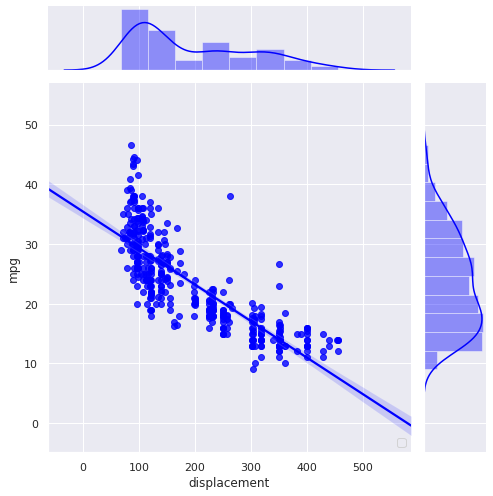

In [ ]:
# Enter your code here
#Fuel consumption and displacement (engine size)

import seaborn as sns
sns.set_style(style="darkgrid")

g = sns.jointplot(x="displacement", y="mpg", data=CarData2,
                  kind="reg", truncate=False,
                  color="b", height=7)
plt.legend(loc='lower right')

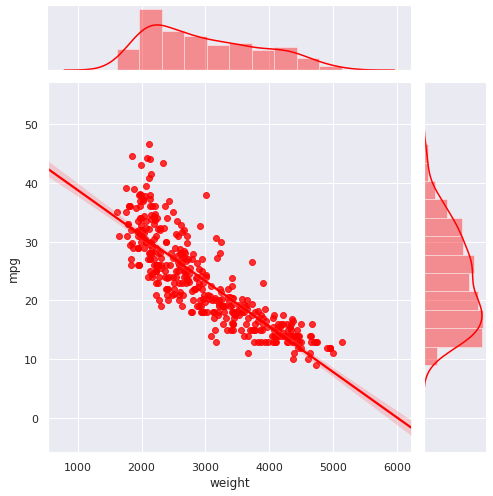

In [ ]:
# Enter your code here
#Fuel consumption and weight

import seaborn as sns
sns.set_style(style="darkgrid")

g = sns.jointplot(x="weight", y="mpg", data=CarData2,
                  kind="reg", truncate=False,
                  color="r", height=7)

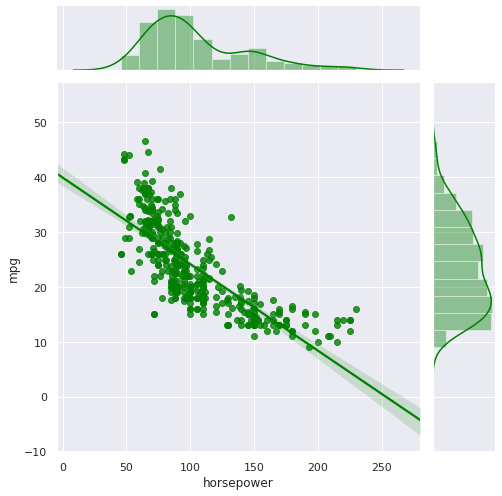

In [ ]:
# Enter your code here
#Fuel consumption and displacement (engine size)

import seaborn as sns
sns.set_style(style="darkgrid")


g = sns.jointplot(x="horsepower", y="mpg", data=CarData2,
                  kind="reg", truncate=False,
                  color="g", height=7)

*Enter your text here*

---------------------
### Hypotheses H4 and H5
At this point, we will formulate two hypotheses that should be confirmed or refuted based on the data:

- H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).
- H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.



### 2.3 Your turn! (20-26 points)

Write Python code to produce (box)plots that should provide good answers to the hypotheses H4 and H5 above (and some text to explain whether they were confirmed or not). 

**Weight**: 20 pts, i.e., 10 pts per hypothesis. 
Up to 6 bonus points for insightful additional hypotheses, code, and/or comments. 

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



#### Testing hypothesis H4:

* H0 : fuel efficiency has not improved over the years represented in this dataset
* H4 : fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).

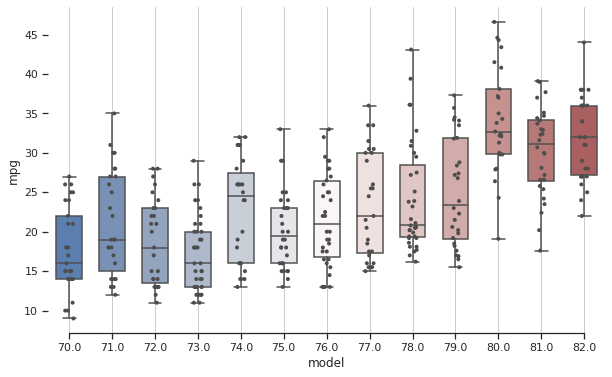

In [ ]:
# Enter your code here
#Fuel consumption and displacement (engine size)

sns.set_style(style="ticks")

# Initialize the figure with x axis
f, ax = plt.subplots(figsize=(10, 6))
#ax.set_xscale("log")



# Plot the orbital period with horizontal boxes
sns.boxplot(x="model", y="mpg", data=CarData2,
            whis=[0, 100], width=.6, palette="vlag")

plt.setp(ax.get_xticklabels(), rotation=0) #rotate x lables



# Add in points to show each observation
sns.stripplot(x="model", y="mpg", data=CarData2,
              size=4, color=".3", linewidth=0)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="mpg")
sns.despine(trim=True, left=True)

#### conclution
median has increased with time. Therefore H0 is rejected and H4 is accepted. 
Therefore fuel efficiency improved over the years represented in this dataset


#### Testing hypothesis H5:

* H0: Japanese cars (within the same time frame) are not more fuel efficient than American or European ones.
* H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


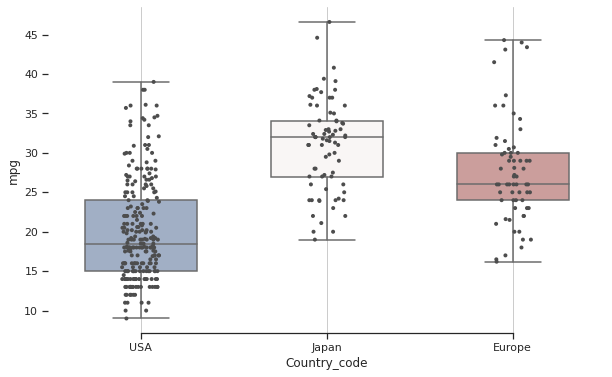

In [ ]:
# Enter your code here
#Fuel consumption and displacement (engine size)

CarData2['Country_code'] = CarData2.origin.replace([1,2,3],['USA','Europe','Japan'])

sns.set_style(style="ticks")

# Initialize the figure with x axis
f, ax = plt.subplots(figsize=(10, 6))
#ax.set_xscale("log")



# Plot the orbital period with horizontal boxes
sns.boxplot(x="Country_code", y="mpg", data=CarData2,
            whis=[0, 100], width=.6, palette="vlag")

plt.setp(ax.get_xticklabels(), rotation=0) #rotate x lables



# Add in points to show each observation
sns.stripplot(x="Country_code", y="mpg", data=CarData2,
              size=4, color=".3", linewidth=0)


# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="mpg")
sns.despine(trim=True, left=True)

#### conclusion

meadian of the japanese cars over mpg is higher than USA and Europe cars. Threfore H0 is rejected and H5 is accepted. 
Which means Japanese cars (within the same time frame) are  more fuel efficient than American or European ones.

*Enter your text*

### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

#####  Things learned
* to import numpy pandas seaborn mathplot
* how to handle numpy arrays pands and collection(counter) together
* to use Counter
* Pearson coefficient
* relationship between numerical and categorical
* transform numpy array to a dictionary
* How to plot using codes
* how to catagorize values to plot in a histogram 
* bar/ column/ scatter plots and their behaviors
* hypothesis testing

It was the most fun to plot different graphs, time-consuming part was to figure out how to use python syntax properly. The most enlightening part was how to manipulate codes to get proper data, The tedious part is finding the proper syntax and combinations. 

If it had another week, I would have tried to find a more elegant code in a short, one-line way. Also to use classes and functions.


